    성별  만나이(세)  만나이(개월)    L        M       S 신장(cm) 백분위수 Unnamed: 7  \
0  NaN     NaN      NaN  NaN      NaN     NaN         1st        3rd   
1  1.0     0.0      0.0  1.0  49.8842  0.0380        45.5       46.3   
2  1.0     NaN      1.0  1.0  54.7244  0.0356        50.2       51.1   
3  1.0     NaN      2.0  1.0  58.4249  0.0342        53.8       54.7   
4  1.0     NaN      3.0  1.0  61.4292  0.0333        56.7       57.6   

  Unnamed: 8 Unnamed: 9  ... Unnamed: 16 Unnamed: 17 Unnamed: 18 신장(cm) 표준점수  \
0        5th       10th  ...        95th        97th        99th        -3SD   
1       46.8       47.5  ...          53        53.4        54.3        44.2   
2       51.5       52.2  ...        57.9        58.4        59.3        48.9   
3       55.1       55.9  ...        61.7        62.2        63.1        52.4   
4       58.1       58.8  ...        64.8        65.3        66.2        55.3   

  Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25  
0        -

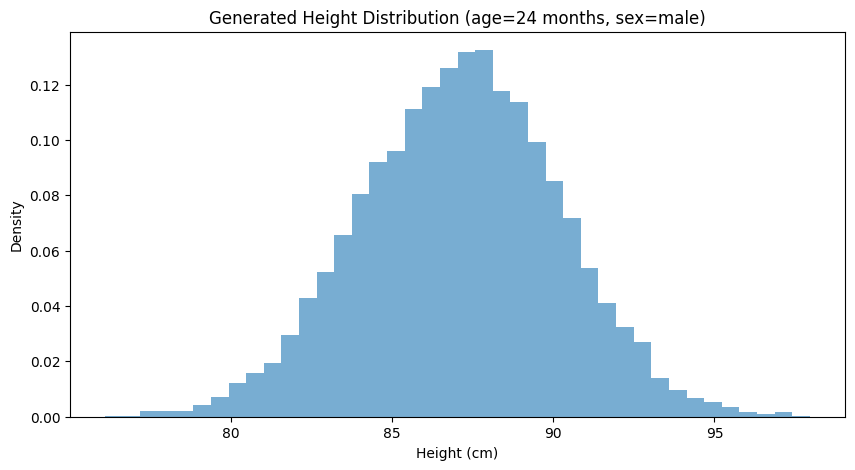

Mean height estimate: 87.11 cm
5th percentile: 82.05 cm
50th percentile (median): 87.18 cm
95th percentile: 92.16 cm


In [ ]:
# ---------------------------
# 1) 필요한 라이브러리 설치/임포트
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ---------------------------
# 2) 성장도표 데이터 불러오기 (사용자 업로드 파일 사용)
# ---------------------------
file_path = "./성장도표+데이터+테이블.xls" # 코랩에서는 파일 업로드 경로로 변경하면 됨
df = pd.read_excel(file_path)

# 데이터 확인
print(df.head())


# ---------------------------
# 3) 특정 나이와 성별에 대해 LMS 파라미터 추출
# ---------------------------
def get_lms(age_month, sex=1):
    """성별(1:남,2:여), 월령 기반 LMS 값 반환"""
    row = df[(df["만나이(개월)"] == age_month) & (df["성별"] == sex)].iloc[0]
    return row["L"], row["M"], row["S"]


# ---------------------------
# 4) LMS → Z-score 변환 함수
# ---------------------------
def height_to_z(height, L, M, S):
    """키 → z-score 변환"""
    if L != 0:
        return ((height / M) ** L - 1) / (L * S)
    else:
        return np.log(height/M) / S


# ---------------------------
# 5) Z-score → height 변환 (역변환)
# ---------------------------
def z_to_height(z, L, M, S):
    """z-score → 키 변환"""
    if L != 0:
        return M * (1 + L * S * z) ** (1 / L)
    else:
        return M * np.exp(S * z)


# ---------------------------
# 6) 평균적인 분포 기반 가우시안 샘플링
# ---------------------------
def generate_height_distribution(age_month, sex=1, samples=10000):
    """특정 나이에 따른 확률적 키 분포 샘플 생성"""
    L, M, S = get_lms(age_month, sex)

    # 정규분포(z-space)에서 샘플 생성
    z_samples = norm.rvs(loc=0, scale=1, size=samples)

    # LMS 역변환 → 실제 키 분포 생성
    height_samples = z_to_height(z_samples, L, M, S)

    return height_samples


# ---------------------------
# 7) 예시 실행: 24개월 남아 키 분포 생성 및 시각화
# ---------------------------
age = 24  # 24개월
sex = 1   # 남아

samples = generate_height_distribution(age, sex)

plt.figure(figsize=(10,5))
plt.hist(samples, bins=40, density=True, alpha=0.6)
plt.title(f"Generated Height Distribution (age={age} months, sex={'male' if sex==1 else 'female'})")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.show()

print(f"Mean height estimate: {np.mean(samples):.2f} cm")
print(f"5th percentile: {np.percentile(samples, 5):.2f} cm")
print(f"50th percentile (median): {np.percentile(samples, 50):.2f} cm")
print(f"95th percentile: {np.percentile(samples, 95):.2f} cm")


In [ ]:
# ============================================
# 0. 공통 설정: 라이브러리 & 성장도표 로드
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.rcParams["figure.figsize"] = (10, 5)

# 성장도표 파일 경로 (Colab에서는 업로드 후 경로 맞춰주면 됨)
growth_file_path = "./성장도표+데이터+테이블.xls"

growth_df = pd.read_excel(growth_file_path)

# 컬럼 이름 확인
print(growth_df.columns)
growth_df.head()


Index(['성별', '만나이(세)', '만나이(개월)', 'L', 'M', 'S', '신장(cm) 백분위수', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', '신장(cm) 표준점수', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'],
      dtype='object')


,성별,만나이(세),만나이(개월),L,M,S,신장(cm) 백분위수,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,신장(cm) 표준점수,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,1st,3rd,5th,10th,...,95th,97th,99th,-3SD,-2SD,-1SD,0.0,+1SD,+2SD,+3SD
1,1.0,0.0,0.0,1.0,49.8842,0.0380,45.5,46.3,46.8,47.5,...,53,53.4,54.3,44.2,46.1,48,49.9,51.8,53.7,55.6
2,1.0,NaN,1.0,1.0,54.7244,0.0356,50.2,51.1,51.5,52.2,...,57.9,58.4,59.3,48.9,50.8,52.8,54.7,56.7,58.6,60.6
3,1.0,NaN,2.0,1.0,58.4249,0.0342,53.8,54.7,55.1,55.9,...,61.7,62.2,63.1,52.4,54.4,56.4,58.4,60.4,62.4,64.4
4,1.0,NaN,3.0,1.0,61.4292,0.0333,56.7,57.6,58.1,58.8,...,64.8,65.3,66.2,55.3,57.3,59.4,61.4,63.5,65.5,67.6


In [ ]:
# ============================================
# 3. 사이즈 추천을 위한 간단 사이즈 테이블 예시
# ============================================

# 실제 서비스에서는 브랜드/카테고리/품목별로 따로 테이블을 가져오는 구조가 좋음 -> !! 수정할 부분 !! -> 실제 브랜드, 카테고리별, 대략적인 수치 데이터 포함
size_table = pd.DataFrame([
    {"size_code": "90", "height_min": 85,  "height_max": 95},
    {"size_code": "100", "height_min": 95, "height_max": 105},
    {"size_code": "110", "height_min": 105,"height_max": 115},
    {"size_code": "120", "height_min": 115,"height_max": 125},
])

size_table


,size_code,height_min,height_max
0,90,85,95
1,100,95,105
2,110,105,115
3,120,115,125


In [16]:
def map_sex_to_lms_code(sex_value):
    """
    DB의 sex 코드(예: 4)를 성장도표 코드(1=남, 2=여)로 매핑.
    실제 비즈니스 룰에 맞게 수정 가능.
    """
    if sex_value in [1, 3]:
        return 1  # 남
    elif sex_value in [2, 4]:
        return 2  # 여
    else:
        # fallback: 남으로 처리하거나, 예외를 던지는 식으로 선택
        return 1

In [17]:
# ============================================
# 1. LMS 관련 유틸 함수
# ============================================

def get_lms(age_month, sex=1):
    """
    성별(1:남, 2:여), 만나이(개월)에 맞는 L, M, S 반환
    """
    row = growth_df[(growth_df["성별"] == sex) & (growth_df["만나이(개월)"] == age_month)]
    if row.empty:
        raise ValueError(f"LMS not found for sex={sex}, age_month={age_month}")
    row = row.iloc[0]
    return row["L"], row["M"], row["S"]

def height_to_z(height, L, M, S):
    """
    실제 키(cm) -> z-score
    """
    height = np.array(height, dtype=float)
    if L != 0:
        z = ((height / M) ** L - 1) / (L * S)
    else:
        z = np.log(height / M) / S
    return z

def z_to_height(z, L, M, S):
    """
    z-score -> 키(cm)
    """
    z = np.array(z, dtype=float)
    if L != 0:
        h = M * (1 + L * S * z) ** (1 / L)
    else:
        h = M * np.exp(S * z)
    return h


In [18]:
# ============================================
# 2. Bayesian Updating for 개인 성장 z-score
# ============================================

class ChildGrowthModel:
    """
    LMS + 정규-정규 베이즈 업데이트로
    '개인 z-score 위치(theta)'를 추정하는 간단한 모델
    """
    def __init__(self, sex, birth_date,
                 prior_mean=0.0, prior_var=1.0,
                 obs_var=0.2**2):
        """
        sex: 1(남), 2(여)
        birth_date: datetime 또는 'YYYY-MM-DD' string
        prior_mean, prior_var: theta의 사전분포
        obs_var: 관측 z-score의 분산(측정 오차 + within-person 변동)
        """
        self.sex = sex
        self.birth_date = pd.to_datetime(birth_date)
        self.theta_mean = prior_mean
        self.theta_var = prior_var
        self.obs_var = obs_var
        self.history = []  # 관측 기록 저장

    def _age_in_months(self, date):
        date = pd.to_datetime(date)
        delta = (date.year - self.birth_date.year) * 12 + (date.month - self.birth_date.month)
        # 일(day)까지 고려하고 싶으면 더 정교하게 계산 가능
        return delta

    def observe(self, date, height_cm):
        """
        특정 날짜의 키 관측값을 받아서
        1) LMS로 z-score로 변환
        2) 베이즈 업데이트로 theta posterior 업데이트
        """
        age_month = self._age_in_months(date)
        L, M, S = get_lms(age_month, self.sex)
        z_obs = height_to_z(height_cm, L, M, S)

        # 정규-정규 conjugate 업데이트
        # prior: N(theta_mean, theta_var)
        # likelihood: N(z_obs, obs_var)
        prior_mean = self.theta_mean
        prior_var = self.theta_var
        obs_var = self.obs_var

        post_var = 1.0 / (1.0/prior_var + 1.0/obs_var)
        post_mean = post_var * (prior_mean/prior_var + z_obs/obs_var)

        self.theta_mean = post_mean
        self.theta_var = post_var

        self.history.append({
            "date": pd.to_datetime(date),
            "age_month": age_month,
            "height_cm": height_cm,
            "z_obs": z_obs,
            "theta_mean": self.theta_mean,
            "theta_var": self.theta_var
        })

        return z_obs, self.theta_mean, self.theta_var

    def get_theta_posterior(self):
        return self.theta_mean, self.theta_var


In [19]:
# 예시: 2022-05-16 출생, 남아
child = ChildGrowthModel(sex=1, birth_date="2022-05-16")

# 관측 예시 (일부 랜덤 예시)
child.observe("2023-05-16", 75.0)   # 12개월 근처
child.observe("2023-08-16", 80.0)   # 15개월 근처
child.observe("2023-11-16", 84.0)   # 18개월 근처

child.history


[{'date': Timestamp('2023-05-16 00:00:00'),
  'age_month': 12,
  'height_cm': 75.0,
  'z_obs': np.float64(-0.314818634195682),
  'theta_mean': np.float64(-0.30271022518815577),
  'theta_var': 0.038461538461538464},
 {'date': Timestamp('2023-08-16 00:00:00'),
  'age_month': 15,
  'height_cm': 80.0,
  'z_obs': np.float64(0.33727310861726006),
  'theta_mean': np.float64(0.011007095304695083),
  'theta_var': 0.0196078431372549},
 {'date': Timestamp('2023-11-16 00:00:00'),
  'age_month': 18,
  'height_cm': 84.0,
  'z_obs': np.float64(0.64538358415762),
  'theta_mean': np.float64(0.21968357190105192),
  'theta_var': 0.013157894736842105}]

In [ ]:
# ============================================
# 3-2. 추천 사이즈 계산 함수
# ============================================

def recommend_size(child_model, target_date, n_samples=5000):
    """
    child_model: ChildGrowthModel 인스턴스
    target_date: 예측 기준 날짜
    n_samples: Monte Carlo sample 수
    """
    # 나이/성별에 맞는 LMS
    age_month = child_model._age_in_months(target_date)
    L, M, S = get_lms(age_month, child_model.sex)

    # 개인 theta posterior에서 샘플링
    theta_mean, theta_var = child_model.get_theta_posterior()
    theta_samples = norm.rvs(loc=theta_mean, scale=np.sqrt(theta_var), size=n_samples)

    # 각 theta에 대해 z ~ N(theta, process_var) 라고 가정할 수도 있음
    # 여기서는 단순하게 z = theta로 사용(개인 위치가 유지된다고 가정)
    z_samples = theta_samples  # 또는 z_samples = norm.rvs(theta_samples, process_std)

    height_samples = z_to_height(z_samples, L, M, S)

    # 각 사이즈 코드별 coverage 계산
    probs = []
    for _, row in size_table.iterrows():
        size_code = row["size_code"]
        h_min = row["height_min"]
        h_max = row["height_max"]
        prob = np.mean((height_samples >= h_min) & (height_samples < h_max))
        probs.append({"size_code": size_code, "prob": prob})

    prob_df = pd.DataFrame(probs).sort_values("prob", ascending=False)
    best_size = prob_df.iloc[0]["size_code"]

    return best_size, prob_df, height_samples


추천 사이즈: 90
  size_code    prob
0        90  0.6474
1       100  0.3526
2       110  0.0000
3       120  0.0000


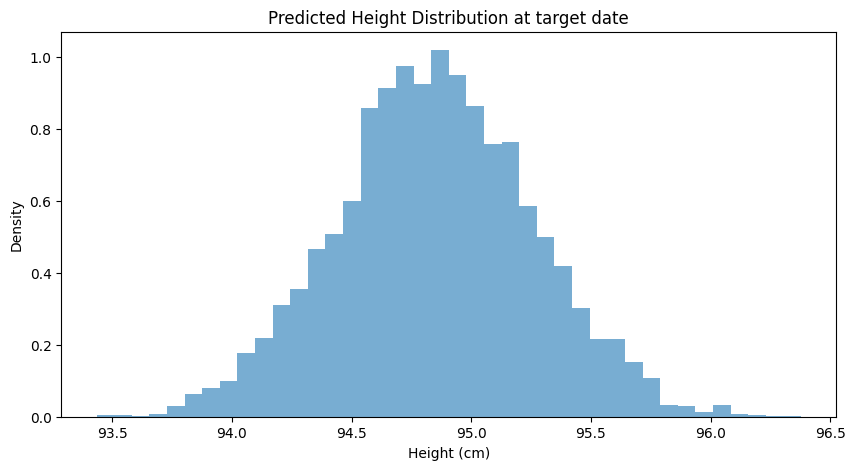

In [ ]:
# 예: 2025-02-01 기준으로 아이에게 어떤 사이즈를 추천할지
best_size, prob_df, height_samples = recommend_size(child, "2025-02-01")

print("추천 사이즈:", best_size)
print(prob_df)

plt.hist(height_samples, bins=40, density=True, alpha=0.6)
plt.title("Predicted Height Distribution at target date")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.show()


성장도표 미리보기:
    성별  만나이(세)  만나이(개월)    L        M       S 신장(cm) 백분위수 Unnamed: 7  \
0  NaN     NaN      NaN  NaN      NaN     NaN         1st        3rd   
1  1.0     0.0      0.0  1.0  49.8842  0.0380        45.5       46.3   
2  1.0     NaN      1.0  1.0  54.7244  0.0356        50.2       51.1   
3  1.0     NaN      2.0  1.0  58.4249  0.0342        53.8       54.7   
4  1.0     NaN      3.0  1.0  61.4292  0.0333        56.7       57.6   

  Unnamed: 8 Unnamed: 9  ... Unnamed: 16 Unnamed: 17 Unnamed: 18 신장(cm) 표준점수  \
0        5th       10th  ...        95th        97th        99th        -3SD   
1       46.8       47.5  ...          53        53.4        54.3        44.2   
2       51.5       52.2  ...        57.9        58.4        59.3        48.9   
3       55.1       55.9  ...        61.7        62.2        63.1        52.4   
4       58.1       58.8  ...        64.8        65.3        66.2        55.3   

  Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25  

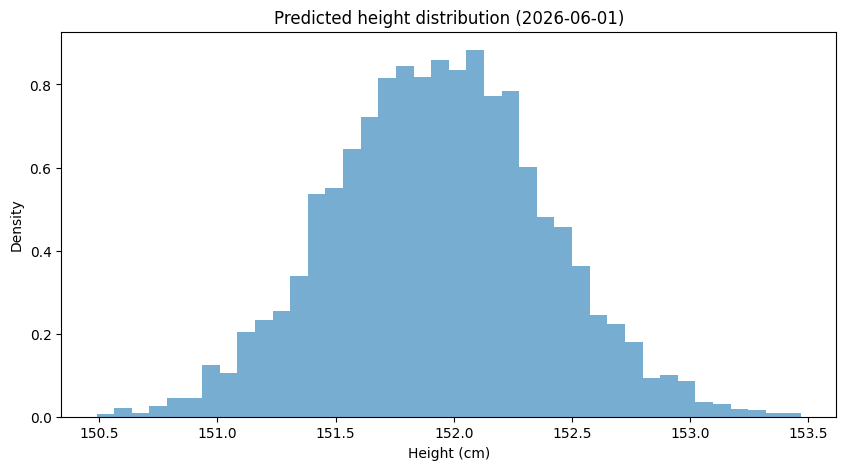

In [21]:
# ============================================
# 0. 라이브러리 & 성장도표 로드
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.rcParams["figure.figsize"] = (10, 5)

# 성장도표 파일 경로 (환경에 맞게 수정)
growth_file_path = "./성장도표+데이터+테이블.xls"
growth_df = pd.read_excel(growth_file_path)

print("성장도표 미리보기:")
print(growth_df.head())


# ============================================
# 1. 성별 매핑 + LMS 유틸 함수
# ============================================

def map_sex_to_lms_code(sex_value):
    """
    DB에 저장된 sex 값을 성장도표의 성별 코드(1=남, 2=여)로 매핑.
    실제 비즈니스 룰에 맞게 이 함수만 수정하면 됨.

    예시:
      - 1, 3  → 남아(1)
      - 2, 4  → 여아(2)
    """
    if sex_value in [1, 3]:
        return 1  # 남
    elif sex_value in [2, 4]:
        return 2  # 여
    else:
        # 정의되지 않은 값은 일단 남(1)으로 처리하거나, raise해도 됨
        return 1


def get_lms(age_month, sex_code):
    """
    성장도표에서 성별(1/2), 만나이(개월)에 맞는 L, M, S 파라미터를 가져옴.
    """
    row = growth_df[(growth_df["성별"] == sex_code) &
                    (growth_df["만나이(개월)"] == age_month)]
    if row.empty:
        raise ValueError(f"LMS not found for sex={sex_code}, age_month={age_month}")
    row = row.iloc[0]
    return row["L"], row["M"], row["S"]


def height_to_z(height, L, M, S):
    """
    실제 키(cm) -> z-score (LMS 변환)
    """
    height = np.array(height, dtype=float)
    if L != 0:
        return ((height / M) ** L - 1) / (L * S)
    else:
        return np.log(height / M) / S


def z_to_height(z, L, M, S):
    """
    z-score -> 실제 키(cm) (LMS 역변환)
    """
    z = np.array(z, dtype=float)
    if L != 0:
        return M * (1 + L * S * z) ** (1 / L)
    else:
        return M * np.exp(S * z)


# ============================================
# 2. 아이 개인 성장 모델 (베이즈 + LMS)
# ============================================

class ChildGrowthModel:
    """
    LMS + 정규-정규 베이즈 업데이트로
    아이 개인 z-score(성장 위치)를 추적하는 모델.
    """
    def __init__(self, sex_code, birth_date,
                 prior_mean=0.0, prior_var=1.0,
                 obs_var=0.2**2):
        """
        sex_code: 성장도표 성별 코드 (1=남, 2=여)
        birth_date: 'YYYY-MM-DD' 또는 datetime
        prior_mean, prior_var: theta(개인 z 평균)의 사전분포
        obs_var: 관측 z-score의 분산 (측정 오차 + within-person 변동)
        """
        self.sex_code = sex_code
        self.birth_date = pd.to_datetime(birth_date)
        self.theta_mean = prior_mean
        self.theta_var = prior_var
        self.obs_var = obs_var
        self.history = []  # 관측 기록 저장

    def _age_in_months(self, date):
        """
        출생일 기준 만나이(개월) 계산 (대략적).
        """
        date = pd.to_datetime(date)
        delta_months = (date.year - self.birth_date.year) * 12 + (date.month - self.birth_date.month)
        # 더 정교하게 일(day)까지 포함하고 싶으면 여기에 보정 로직 추가
        return max(delta_months, 0)

    def observe(self, date, height_cm):
        """
        특정 날짜의 키 관측값을 받아:
        1) LMS로 z-score로 변환하고
        2) 베이즈 업데이트로 theta(개인 z 위치) posterior 업데이트
        """
        date = pd.to_datetime(date)
        age_month = self._age_in_months(date)
        L, M, S = get_lms(age_month, self.sex_code)
        z_obs = height_to_z(height_cm, L, M, S)

        # 정규-정규 conjugate 업데이트
        prior_mean = self.theta_mean
        prior_var = self.theta_var
        obs_var = self.obs_var

        post_var = 1.0 / (1.0/prior_var + 1.0/obs_var)
        post_mean = post_var * (prior_mean/prior_var + z_obs/obs_var)

        self.theta_mean = post_mean
        self.theta_var = post_var

        self.history.append({
            "date": date,
            "age_month": age_month,
            "height_cm": height_cm,
            "z_obs": z_obs,
            "theta_mean": self.theta_mean,
            "theta_var": self.theta_var
        })

        return z_obs, self.theta_mean, self.theta_var

    def get_theta_posterior(self):
        """
        현재까지의 관측을 반영한 개인 z-score 평균/분산 (posterior) 반환
        """
        return self.theta_mean, self.theta_var


# ============================================
# 3. DB JSON 구조를 성장 모델로 변환 (nickname 기준)
# ============================================

def build_growth_models_from_users(user_records, measurement_date=None):
    """
    user_records: DB에서 읽어온 유저 JSON들의 리스트
      각 원소 예:
      {
          "nickname": "...",
          "baby": [
              {
                  "birth": "YYYY-MM-DD",
                  "height": 120,
                  "weight": 20,
                  "sex": 4,
                  ...
              },
              ...
          ],
          ...
      }

    measurement_date: 해당 height가 측정된 날짜 (기본: 오늘 날짜)

    return:
      growth_models = {
        nickname: [ChildGrowthModel, ChildGrowthModel, ...]  # baby index 순서
      }
    """
    if measurement_date is None:
        measurement_date = pd.Timestamp.today()
    else:
        measurement_date = pd.to_datetime(measurement_date)

    growth_models = {}

    for user in user_records:
        nickname = user.get("nickname")
        babies = user.get("baby", [])

        models_for_user = []

        for baby_idx, baby in enumerate(babies):
            birth = baby.get("birth")
            height = baby.get("height", None)
            sex_raw = baby.get("sex", None)

            # 필수 정보 없으면 스킵
            if birth is None or sex_raw is None:
                continue

            # DB 성별 코드 → 성장도표 성별 코드(1/2)
            sex_code = map_sex_to_lms_code(sex_raw)

            model = ChildGrowthModel(sex_code=sex_code, birth_date=birth)

            # DB에 저장된 height를 measurement_date 기준 관측으로 사용
            if height is not None:
                try:
                    model.observe(measurement_date, height)
                except Exception as e:
                    print(f"[WARN] observe 실패 - nickname={nickname}, baby_idx={baby_idx}, err={e}")

            models_for_user.append(model)

        growth_models[nickname] = models_for_user

    return growth_models


# ============================================
# 4. 사이즈 테이블 + 사이즈 추천 함수
# ============================================

# 예시 사이즈 테이블 (실제 서비스에선 DB/설정으로 관리 추천)
size_table = pd.DataFrame([
    {"size_code": "90",  "height_min": 85,  "height_max": 95},
    {"size_code": "100", "height_min": 95,  "height_max": 105},
    {"size_code": "110", "height_min": 105, "height_max": 115},
    {"size_code": "120", "height_min": 115, "height_max": 125},
])


def recommend_size(child_model, target_date, n_samples=5000):
    """
    특정 날짜(target_date)를 기준으로, 아이의 키 분포를 몬테카를로로 생성하고
    각 사이즈별로 '키가 그 범위에 들어갈 확률'을 계산한 뒤
    가장 확률이 높은 사이즈를 추천.
    """
    target_date = pd.to_datetime(target_date)
    age_month = child_model._age_in_months(target_date)
    L, M, S = get_lms(age_month, child_model.sex_code)

    # 개인 z 위치 theta posterior에서 샘플링
    theta_mean, theta_var = child_model.get_theta_posterior()
    theta_samples = norm.rvs(loc=theta_mean, scale=np.sqrt(theta_var), size=n_samples)
    z_samples = theta_samples  # 개인 위치를 유지한다고 가정
    height_samples = z_to_height(z_samples, L, M, S)

    probs = []
    for _, row in size_table.iterrows():
        code = row["size_code"]
        h_min = row["height_min"]
        h_max = row["height_max"]
        prob = np.mean((height_samples >= h_min) & (height_samples < h_max))
        probs.append({"size_code": code, "prob": prob})

    prob_df = pd.DataFrame(probs).sort_values("prob", ascending=False)
    best_size = prob_df.iloc[0]["size_code"]

    return best_size, prob_df, height_samples


# ============================================
# 5. 몬테카를로 성장 궤적 시뮬레이션 (옵션)
# ============================================

def simulate_growth_trajectory(child_model, months_ahead=24,
                               n_samples=2000,
                               process_std=0.1):
    """
    앞으로 months_ahead 개월까지, 매달 키 분포를
    몬테카를로로 시뮬레이션.

    process_std: 월별 개인 z 위치의 랜덤 워크 강도 (성장 패턴 변동성)
    """
    theta_mean, theta_var = child_model.get_theta_posterior()
    theta_samples = norm.rvs(loc=theta_mean, scale=np.sqrt(theta_var), size=n_samples)

    if len(child_model.history) == 0:
        raise ValueError("Child model has no observations")
    last_date = max(h["date"] for h in child_model.history)

    results = []

    for m in range(months_ahead + 1):
        target_date = last_date + pd.DateOffset(months=m)
        age_month = child_model._age_in_months(target_date)
        L, M, S = get_lms(age_month, child_model.sex_code)

        # 월이 진행될 때마다 z 위치에 process noise 추가
        if m > 0:
            theta_samples = norm.rvs(loc=theta_samples, scale=process_std, size=n_samples)

        z_samples = theta_samples
        height_samples = z_to_height(z_samples, L, M, S)

        results.append({
            "month_ahead": m,
            "date": target_date,
            "age_month": age_month,
            "height_samples": height_samples
        })

    return results


def summarize_trajectory_sim(results):
    """
    시뮬레이션 결과를 월별로 mean / p5 / p50 / p95 요약
    """
    summary = []
    for r in results:
        hs = r["height_samples"]
        summary.append({
            "month_ahead": r["month_ahead"],
            "date": r["date"],
            "age_month": r["age_month"],
            "mean_height": np.mean(hs),
            "p5": np.percentile(hs, 5),
            "p50": np.percentile(hs, 50),
            "p95": np.percentile(hs, 95),
        })
    return pd.DataFrame(summary)


def size_change_probability(results, current_size_code):
    """
    현재 사이즈(current_size_code)를 기준으로,
    각 month_ahead에서 '현재 사이즈 상한을 넘는 비율' 계산
    → 이걸 알림/threshold 로직에 활용 가능.
    """
    row = size_table[size_table["size_code"] == current_size_code]
    if row.empty:
        raise ValueError(f"Unknown size_code: {current_size_code}")
    row = row.iloc[0]
    h_max = row["height_max"]

    probs = []
    for r in results:
        hs = r["height_samples"]
        prob_over = np.mean(hs > h_max)
        probs.append({
            "month_ahead": r["month_ahead"],
            "date": r["date"],
            "prob_over_current_size": prob_over
        })
    return pd.DataFrame(probs)


# ============================================
# 6. 예시: 주어진 JSON 구조로부터 전체 파이프라인 테스트
# ============================================

# DB에서 읽어온 유저 레코드 예시 (질문에서 준 구조)
user_record_example = {
    "nickname": "MovingJu",
    "pw": "uhaha",
    "profile_photo": "",
    "bio": "Halo",
    "locatioin": {
        "si": "용인시",
        "gu": "기흥구"
    },
    "baby": [
        {
            "birth": "2025-11-22",
            "height": 120,
            "weight": 20,
            "sex": 4,  # 여아로 매핑될 것 (2)
            "tags": ["활동성", "잠옷용"]
        },
        {
            "birth": "2024-01-28",
            "height": 50,
            "weight": 12,
            "sex": 4,  # 여아
            "tags": ["공주님", "파티/특별한 날"]
        }
    ],
    "clothes": [
        {
            "title": "super big shirt",
            "picture": "",
            "price": 9999,
            "size": 85,
            "content": "즐~~~~ 예쁘게 입어라~~",
            "tags": ["모던", "클래식"]
        },
        {
            "title": "겁내 이쁜 옷",
            "picture": "",
            "price": 99999,
            "size": 50,
            "content": "사실 안예뻐여",
            "tags": ["겨울용", "레이어링 가능"]
        }
    ],
    "writings": [1, 2]
}

# 여러 유저가 있다고 가정하면 리스트로 묶어서 전달
user_records = [user_record_example]

# 특정 기준일에 키가 측정되었다고 가정 (질문 시점 기준)
measurement_date = "2025-11-23"
growth_models = build_growth_models_from_users(user_records, measurement_date=measurement_date)

# MovingJu 의 첫 번째 아이 모델 가져오기
movingju_models = growth_models["MovingJu"]
print("MovingJu 아이 수:", len(movingju_models))
for idx, m in enumerate(movingju_models):
    print(f"baby index {idx} -> theta_mean={m.theta_mean:.3f}, theta_var={m.theta_var:.3f}")

# 예시: 2026-06-01 기준으로 첫 번째 아이의 추천 사이즈
if len(movingju_models) > 0:
    child0 = movingju_models[0]
    best_size, prob_df, height_samples = recommend_size(child0, "2026-06-01")
    print("\n[사이즈 추천 결과]")
    print("추천 사이즈:", best_size)
    print(prob_df)

    plt.hist(height_samples, bins=40, density=True, alpha=0.6)
    plt.title("Predicted height distribution (2026-06-01)")
    plt.xlabel("Height (cm)")
    plt.ylabel("Density")
    plt.show()
